In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# import tensorflow as tf
basePath = 'C:/Users/ASUS/Documents/Code/Capstone'
book = pd.read_csv(basePath+'/Buku.csv')

In [46]:
!pip install tensorflow

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, concatenate, Dense, Dot
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from sklearn.metrics.pairwise import cosine_similarity

In [48]:
print("Dataset buku memiliki %d baris dan %d kolom" % book.shape)
book.head(10)

Dataset buku memiliki 30 baris dan 12 kolom


,P-ISSN,E-ISSN,Keyword,Judul,Penulis,TahunTerbit,Publisher,Volume,NoEdisi,JumlahHalaman,Pdf,Reference
0,2339-2401,2477-0221,"Perilaku Sosial, Anak Putus Sekolah.",Perilaku Sosial Anak Putus Sekolah,"Rahmad. M, Muhlis Madani, Risfaisal",2016,Program Studi Pendidikan Sosiologi Fakultas Ke...,4,2,10,Books/500-1382-1-PB.pdf,https://journal.unismuh.ac.id/index.php/equili...
1,2252-7877,2548-3582,"maggot, budidaya, penghematan biaya pakan",Analisis Usaha Budidaya Maggot sebagai Alterna...,"Rizal Ula Ananta Fauzi, Eka Resty Novieta Sari",2018,"Department of Agro-Industrial Technology, Facu...",7,1,8,Books/312-1411-1-PB.pdf,https://industria.ub.ac.id/index.php/industri/...
2,2252-861x,2715-2685,"Agroindustri, Tahu, Pendapatan, Biaya, dan Efi...",ANALISIS USAHA AGROINDUSTRI TAHU DI DESA KAMPU...,"Erlangga Marsila , Elfi Indrawanis dan Jamalludin",2022,"Fakultas Pertanian, Universitas Islam Kuantan ...",11,2,7,Books/2214-ArticleText-9396-1-10-20220518.pdf,https://www.ejournal.uniks.ac.id/index.php/GRE...
3,NaN,2807-5633,"Indonesian, Indonesian Education Report Card, ...",Rapor Pendidikan Indonesia: Quo Vadis Kualitas...,"Dwi Shintia, Masduki Asbari, Fadhila Khairunis...",2023,Journal of Information Systems and Management ...,2,6,4,Books/ArticleText-0206-18-21.pdf,https://jisma.org/index.php/jisma/article/view...
4,3021-7474,3021-7466,"education, effective, interactive, Technology,...",Analisa Pengaruh Virtual Reality Terhadap Perk...,"Charles, Delvian Yosuky,Tio Sania Rachmi, Eryc",2023,"Pusat Riset dan Inovasi Nasional, Universitas ...",1,3,14,Books/40-53+Analisa+Pengaruh+Virtual+Reality+T...,https://jurnal.stikes-ibnusina.ac.id/index.php...
5,2580-3735,2580-1147,"Akhlak, Media Pembelajaran, Pengembangan",Pengembangan Game Interaktif Wordwall untuk Me...,"Olisna Olisna, Milhatun Zannah, Auliani Sukma,...",2022,Universitas Pahlawan Tuanku Tambusai,6,3,11,"Books/admin,+97.+Olisna+4133+-+4143.pdf",https://jbasic.org/index.php/basicedu/article/...
6,NaN,2723-6390,"Pengembangan Aplikasi, Game Edukatif, Literasi...",Strategi Literasi Budaya Anak Usia Dini melalu...,"Esti Kurniawati Mahardika, Tiara Sevi Nurmanit...",2023,Perkumpulan Pengelola Jurnal PAUD Indonesia,4,2,14,Books/287-ArticleText-1948-1-10-20231117.pdf,https://www.murhum.ppjpaud.org/index.php/murhu...
7,2356-1327,2549-8959,"game edukasi 3d, cinta tanah air, anak usia dini",Pengembangan Game Edukasi 3D untuk Menumbuhkan...,"Indaria Tri Hariyani, Norma Diana Fitri",2023,Universitas Pahlawan Tuanku Tambusai,7,2,14,Books/3378-18624-3-PB.pdf,https://mail.obsesi.or.id/index.php/obsesi/art...
8,2580-3735,2580-1147,"Game Edukasi, Android, Hasil Belajar",Pengembangan Game Edukasi Berbasis Android unt...,"Ririn Windawati, Henny Dewi Koeswanti",2021,Universitas Pahlawan Tuanku Tambusai,5,2,12,"Books/admin,+64+Ririn+Windawati+1027-1038.pdf",https://jbasic.org/index.php/basicedu/article/...
9,NaN,1411-3201,"E-commerce, Model View Controller, Website",WEBSITE E-COMMERCE MENGGUNAKAN MODEL VIEW CONT...,Donni Prabowo,2015,Universitas Amikom Yogyakarta,16,1,7,Books/225-705-1-PB.pdf,https://ojs.amikom.ac.id/index.php/dasi/articl...


In [49]:
book.drop(axis=1, labels=['P-ISSN', 'Reference'], inplace=True)
book.head(10)

,E-ISSN,Keyword,Judul,Penulis,TahunTerbit,Publisher,Volume,NoEdisi,JumlahHalaman,Pdf
0,2477-0221,"Perilaku Sosial, Anak Putus Sekolah.",Perilaku Sosial Anak Putus Sekolah,"Rahmad. M, Muhlis Madani, Risfaisal",2016,Program Studi Pendidikan Sosiologi Fakultas Ke...,4,2,10,Books/500-1382-1-PB.pdf
1,2548-3582,"maggot, budidaya, penghematan biaya pakan",Analisis Usaha Budidaya Maggot sebagai Alterna...,"Rizal Ula Ananta Fauzi, Eka Resty Novieta Sari",2018,"Department of Agro-Industrial Technology, Facu...",7,1,8,Books/312-1411-1-PB.pdf
2,2715-2685,"Agroindustri, Tahu, Pendapatan, Biaya, dan Efi...",ANALISIS USAHA AGROINDUSTRI TAHU DI DESA KAMPU...,"Erlangga Marsila , Elfi Indrawanis dan Jamalludin",2022,"Fakultas Pertanian, Universitas Islam Kuantan ...",11,2,7,Books/2214-ArticleText-9396-1-10-20220518.pdf
3,2807-5633,"Indonesian, Indonesian Education Report Card, ...",Rapor Pendidikan Indonesia: Quo Vadis Kualitas...,"Dwi Shintia, Masduki Asbari, Fadhila Khairunis...",2023,Journal of Information Systems and Management ...,2,6,4,Books/ArticleText-0206-18-21.pdf
4,3021-7466,"education, effective, interactive, Technology,...",Analisa Pengaruh Virtual Reality Terhadap Perk...,"Charles, Delvian Yosuky,Tio Sania Rachmi, Eryc",2023,"Pusat Riset dan Inovasi Nasional, Universitas ...",1,3,14,Books/40-53+Analisa+Pengaruh+Virtual+Reality+T...
5,2580-1147,"Akhlak, Media Pembelajaran, Pengembangan",Pengembangan Game Interaktif Wordwall untuk Me...,"Olisna Olisna, Milhatun Zannah, Auliani Sukma,...",2022,Universitas Pahlawan Tuanku Tambusai,6,3,11,"Books/admin,+97.+Olisna+4133+-+4143.pdf"
6,2723-6390,"Pengembangan Aplikasi, Game Edukatif, Literasi...",Strategi Literasi Budaya Anak Usia Dini melalu...,"Esti Kurniawati Mahardika, Tiara Sevi Nurmanit...",2023,Perkumpulan Pengelola Jurnal PAUD Indonesia,4,2,14,Books/287-ArticleText-1948-1-10-20231117.pdf
7,2549-8959,"game edukasi 3d, cinta tanah air, anak usia dini",Pengembangan Game Edukasi 3D untuk Menumbuhkan...,"Indaria Tri Hariyani, Norma Diana Fitri",2023,Universitas Pahlawan Tuanku Tambusai,7,2,14,Books/3378-18624-3-PB.pdf
8,2580-1147,"Game Edukasi, Android, Hasil Belajar",Pengembangan Game Edukasi Berbasis Android unt...,"Ririn Windawati, Henny Dewi Koeswanti",2021,Universitas Pahlawan Tuanku Tambusai,5,2,12,"Books/admin,+64+Ririn+Windawati+1027-1038.pdf"
9,1411-3201,"E-commerce, Model View Controller, Website",WEBSITE E-COMMERCE MENGGUNAKAN MODEL VIEW CONT...,Donni Prabowo,2015,Universitas Amikom Yogyakarta,16,1,7,Books/225-705-1-PB.pdf


In [50]:
book.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   E-ISSN         30 non-null     object
 1   Keyword        30 non-null     object
 2   Judul          30 non-null     object
 3   Penulis        30 non-null     object
 4   TahunTerbit    30 non-null     int64 
 5   Publisher      30 non-null     object
 6   Volume         30 non-null     int64 
 7   NoEdisi        30 non-null     int64 
 8   JumlahHalaman  30 non-null     int64 
 9   Pdf            30 non-null     object
dtypes: int64(4), object(6)
memory usage: 2.5+ KB


In [51]:
book.duplicated().sum()

0

In [52]:
df = book.copy()
nums_book = df.groupby('TahunTerbit')['Pdf'].count().reset_index()
nums_book.rename(columns = {'Pdf' : 'TotalBuku'}, inplace=True)
nums_book['BooksPct'] = round(nums_book.TotalBuku / nums_book.TotalBuku.sum(), 2)
nums_book

,TahunTerbit,TotalBuku,BooksPct
0,2015,2,0.07
1,2016,2,0.07
2,2018,4,0.13
3,2019,1,0.03
4,2020,2,0.07
5,2021,3,0.10
6,2022,3,0.10
7,2023,13,0.43


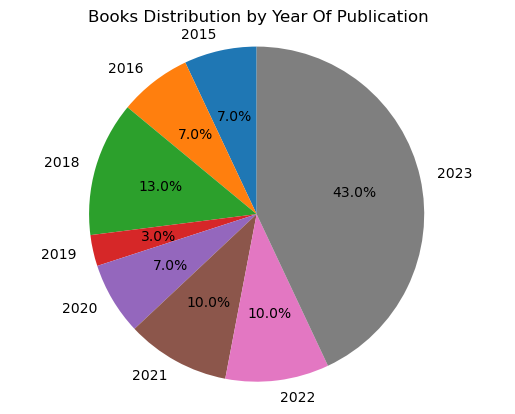

In [53]:
labels = nums_book['TahunTerbit']
sizes = nums_book['BooksPct']

# Membuat pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        startangle=90)

# Konfigurasi tambahan
plt.axis('equal')  # Membuat pie chart menjadi lingkaran sempurna
plt.title('Books Distribution by Year Of Publication')

# Menampilkan pie chart
plt.show()

In [64]:
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Assuming 'book' is a DataFrame containing book information with a 'Judul' column.

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
keyword_matrix = tfidf_vectorizer.fit_transform(book['Judul'])

# Neural Network Model for Content-Based Recommendation
input_layer = tf.keras.layers.Input(shape=(keyword_matrix.shape[1],))
embedding_layer = tf.keras.layers.Embedding(input_dim=keyword_matrix.shape[1], output_dim=50)(input_layer)
flatten_layer = tf.keras.layers.Flatten()(embedding_layer)
normalized_layer = tf.keras.layers.Lambda(lambda x: tf.math.l2_normalize(x, axis=1))(flatten_layer)

model = tf.keras.Model(inputs=input_layer, outputs=normalized_layer)

# Compile the model (no need for training in this case)
model.compile(optimizer='adam', loss='cosine_similarity')

# Get embeddings for all book titles
book_embeddings = model.predict(keyword_matrix)

def get_keyword_recommendations(keyword, model, tfidf_vectorizer, book_embeddings):
    input_vector = tfidf_vectorizer.transform([keyword])
    input_embedding = model.predict(input_vector)

    # Calculate cosine similarity between input embedding and all book embeddings
    similarities = cosine_similarity(input_embedding, book_embeddings).flatten()

    # Get indices of top similar books
    similar_books = similarities.argsort()[:-4:-1]

    return book['Judul'].iloc[similar_books]

# Example usage
keyword_recommendations = get_keyword_recommendations("Lahan", model, tfidf_vectorizer, book_embeddings)
print("Keyword Recommendations:")
print(keyword_recommendations)


InvalidArgumentError: {{function_node __wrapped__SerializeManySparse_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[1] = [0,174] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SerializeManySparse] name: 

In [ ]:
book['BookID'] = range(len(book))
tfidf_vectorizer = TfidfVectorizer()
keyword_matrix = tfidf_vectorizer.fit_transform(book['Judul'])

def get_keyword_recommendations(keyword):
    input_vector = tfidf_vectorizer.transform([keyword])
    keyword_similarities = cosine_similarity(keyword_matrix, input_vector)
    similar_books = keyword_similarities.argsort(axis=0)[:-4:-1].flatten()
    return book['Judul'].iloc[similar_books]

keyword_recommendations = get_keyword_recommendations("Lahan")
print("Keyword Recommendations:")
print(keyword_recommendations)

Keyword Recommendations:
11    PEMANFAATAN LAHAN DENGAN MENGGUNAKAN SISTEM HI...
29    KONSEP PERLINDUNGAN HUKUM ATAS PRIVASI DAN DAT...
28    PENGEMBANGAN MEDIA PEMBELAJARAN MATEMATIKA BER...
Name: Judul, dtype: object


In [ ]:
# input_dim = len(tfidf_vectorizer.get_feature_names_out())
# embedding_dim = 50

# model = Model(inputs=Input(shape=(input_dim,)), outputs=Dense(embedding_dim, activation='relu')(Input(shape=(input_dim, ))))
# model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

# model.fit(keyword_matrix, keyword_matrix.toarray(), epochs=10, batch_size=1, verbose=2)

# def get_tensorflow_keyword_recommendations(input_string):

#     input_vector = tfidf_vectorizer.transform([input_string])


#     input_embedding = model.predict(input_vector)


#     embedding_similarities = cosine_similarity(model.predict(keyword_matrix), input_embedding)


#     similar_books = embedding_similarities.argsort(axis=0)[:-4:-1].flatten()

#     return book['Judul'].iloc[similar_books]

# # Contoh penggunaan untuk rekomendasi berdasarkan input string menggunakan TensorFlow
# user_input = 'kata1, kata3'
# tensorflow_keyword_recommendations = get_tensorflow_keyword_recommendations(user_input)
# print("TensorFlow Keyword Recommendations based on input string:")
# print(tensorflow_keyword_recommendations)

In [ ]:

# # Pisahkan keyword menjadi daftar kata kunci
# book['Keyword'] = book['Keyword'].apply(lambda x: ', '.join(x))
# book['Keyword'] = book['Keyword'].apply(lambda x: [k.strip() for k in x.split(',')])

# # Gunakan MultiLabelBinarizer untuk one-hot encoding keyword
# mlb = MultiLabelBinarizer()
# keyword_encoded = pd.DataFrame(mlb.fit_transform(book['Keyword']), columns=mlb.classes_, index=book.index)

# # Gabungkan dengan fitur lain dalam dataset
# book = pd.concat([book, keyword_encoded], axis=1)

# # Tampilkan hasil
# print(book)